## NLP ASSIGNMENT 1
CLASSIFY WHETHER THE MESSAGE IS A SPAM OR NOT.

INITIAL IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = data.rename(columns= {"v1":"Label","v2":"Message"})
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1)
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.isnull().sum()

Label      0
Message    0
dtype: int64

In [6]:
pd.DataFrame(data['Label'].value_counts(normalize=True), index=None)

,Label
ham,0.865937
spam,0.134063


In [7]:
pd.DataFrame(data['Label'].value_counts(normalize=False), index=None)

,Label
ham,4825
spam,747


In [8]:
#Adding new feature 'message_length'
data['message_length']=data['Message'].apply(lambda x: len(x.split(" ")))

In [9]:
df_ham= data["message_length"][data["Label"]=="ham"].value_counts()
df_spam=data["message_length"][data["Label"]=="spam"].value_counts()
df_ham=pd.DataFrame(df_ham)
df_spam=pd.DataFrame(df_spam)

In [10]:
df_ham.head()

,message_length
6,412
7,378
5,348
8,337
9,304


In [11]:
df_spam.head()

,message_length
28,85
27,73
25,67
26,64
24,61


Text(0, 0.5, 'Message Length Frequencies')

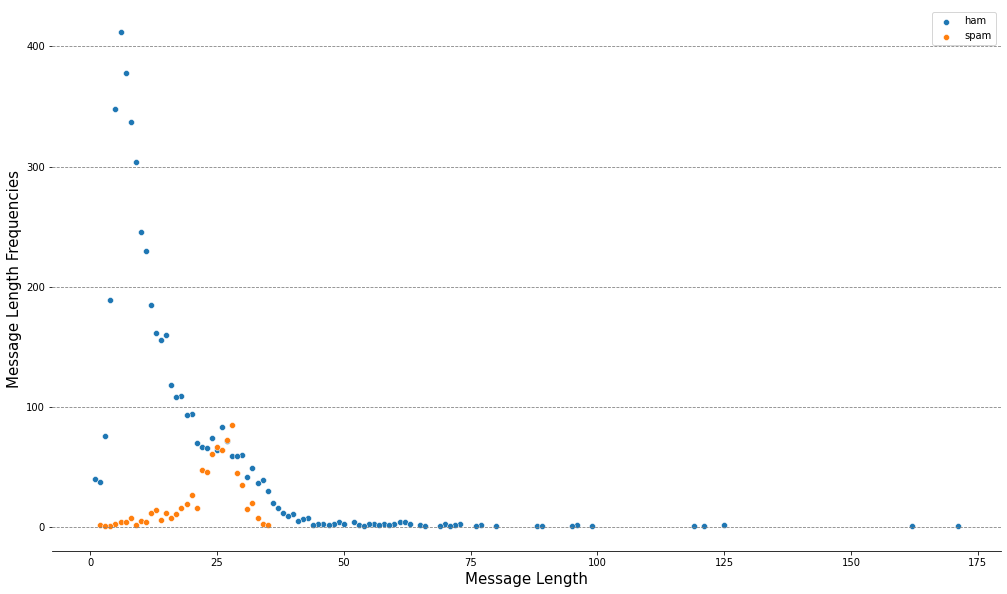

In [12]:
import seaborn as sns
fig=plt.figure(figsize=(17,10))

ax=plt.axes()

#Dealing with spines
for i in ['left','top','right']:
    ax.spines[i].set_visible(False)
    
ax.grid(linestyle="--",axis='y',color='gray')

sns.scatterplot(data=df_ham,x=df_ham.index,y=df_ham['message_length'],label="ham")
sns.scatterplot(data=df_spam,x=df_spam.index,y=df_spam['message_length'],label='spam')
plt.xlabel("Message Length",fontsize=15)
plt.ylabel("Message Length Frequencies",fontsize=15)

We observe that spam messages have more consistent high wordcount.

In [13]:
import re
import string

In [14]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!


True

Cleaning

In [15]:
#Using regex functions to clean the text

def text_cleaning(text):
    
    #Converting text into lowercase
    text = str(text).lower()
    
    #Removing square brackets from the text
    text = re.sub('\[.*?\]','',text)
    
    
    #Removing links starting with (https or www)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    #Removing <"text"> type of text 
    text = re.sub('<.*?>+','',text)
    
    #Removing punctuations
    text = re.sub("[%s]" % re.escape(string.punctuation),'',text)
    
    #Removing new lines
    text = re.sub("\n",'',text)
    
    #Removing alphanumeric numbers 
    text = re.sub('\w*\d\w*','',text)
    
    return(text)
        

In [16]:
#Applying 'text_cleaning' function on the dataset
data['cleaned_text']=data['Message'].apply(text_cleaning)
data.head()

,Label,Message,message_length,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",20,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,11,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah i dont think he goes to usf he lives aroun...


Removing stopwords

In [17]:
#removing stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

wordnet = WordNetLemmatizer()
def remove_stopwords(text):
    text = text.split()
    text = [wordnet.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    text = " ".join(text)
    return(text)

data['cleaned_text']=data['cleaned_text'].apply(remove_stopwords)
data.head()

,Label,Message,message_length,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,11,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think go usf life around though


In [18]:
df_ham_cleaned= data[data["Label"]=="ham"]
df_spam_cleaned=data[data["Label"]=="spam"]
df_ham_cleaned=pd.DataFrame(df_ham_cleaned)
df_spam_cleaned=pd.DataFrame(df_spam_cleaned)

In [19]:
para_ham = " ".join([word for word in df_ham_cleaned['cleaned_text']])
para_spam = " ".join([word for word in df_spam_cleaned['cleaned_text']])

WORDCLOUD

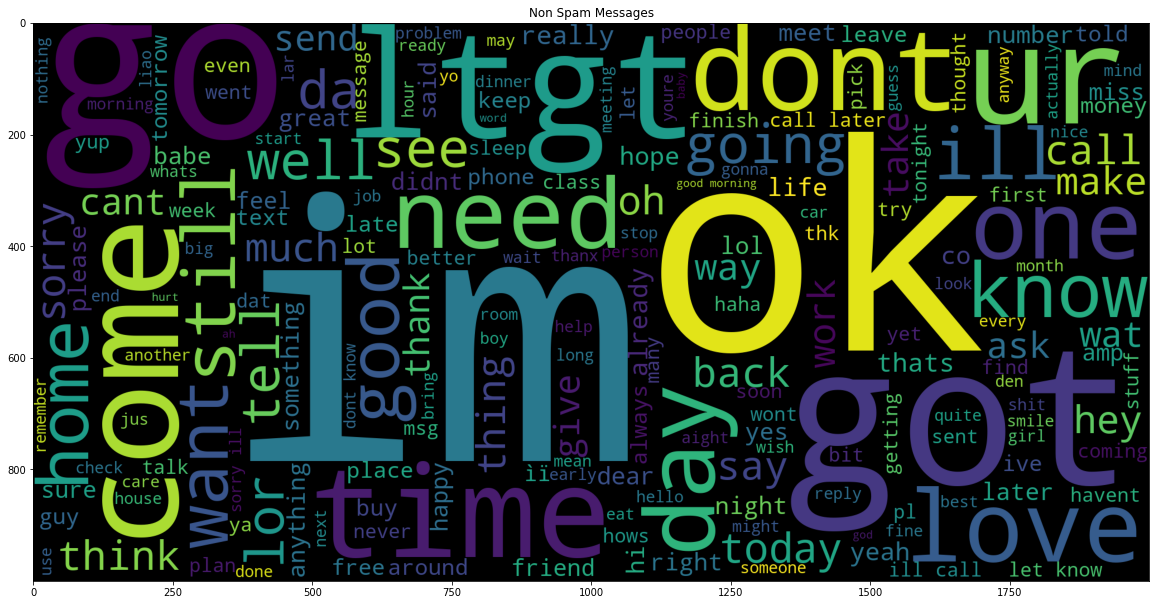

In [20]:
#wordcloud
from wordcloud import WordCloud

wordcloud=WordCloud(width=2000,height=1000).generate(para_ham)
plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Non Spam Messages")
plt.show()

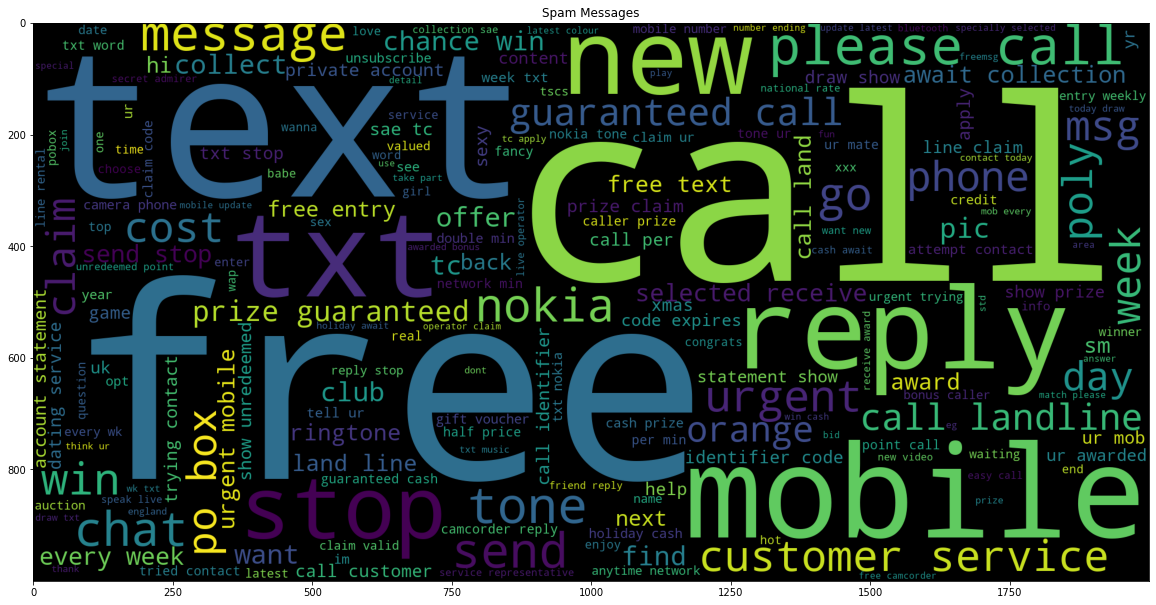

In [21]:
from wordcloud import WordCloud

wordcloud=WordCloud(width=2000,height=1000).generate(para_spam)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Spam Messages")
plt.show()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Label Encoder

In [23]:
le=LabelEncoder()
data['Label']=le.fit_transform(data["Label"])
data.head()

,Label,Message,message_length,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,11,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think go usf life around though


Splitting

In [24]:
#splitting 
x = data['cleaned_text']
y = data["Label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123)

In [25]:
#tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Usinf TF-IDF method
tf=TfidfVectorizer()
tf_vect=tf.fit(x_train)
x_train_vector_tf= tf_vect.transform(x_train)
x_test_vector_tf=tf_vect.transform(x_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import accuracy_score , classification_report

In [27]:
lis_tf=[]
def modelling_tf(dic):
    for models in dic:
        print("Training and Predicting with", models)
        dic[models].fit(x_train_vector_tf,y_train)
        pred=dic[models].predict(x_test_vector_tf)
        print()
        print("Accuracy of" , models,":",accuracy_score(y_test,pred))
        lis_tf.append(accuracy_score(y_test,pred))
        print("Classification report of", models)
        print()
        print(classification_report(y_test,pred))
        print("----------------------------------------------------------------")
        print()
        
dic={"Naive Bayes": MultinomialNB(),"Decision Tree": DecisionTreeClassifier(random_state=42),"XGB":xgb.XGBClassifier(n_estimators=80)}

In [28]:
modelling_tf(dic)

Training and Predicting with Naive Bayes

Accuracy of Naive Bayes : 0.9655419956927495
Classification report of Naive Bayes

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.99      0.73      0.84       171

    accuracy                           0.97      1393
   macro avg       0.98      0.86      0.91      1393
weighted avg       0.97      0.97      0.96      1393

----------------------------------------------------------------

Training and Predicting with Decision Tree

Accuracy of Decision Tree : 0.9576453697056713
Classification report of Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1222
           1       0.83      0.83      0.83       171

    accuracy                           0.96      1393
   macro avg       0.90      0.90      0.90      1393
weighted avg       0.96      0.96      0.96      1393

------------------------

In [29]:
models_dataframe=pd.DataFrame({
    "Models":["Naive Bayes" , "Decision Tree" , "XGBoost"] ,
    "Accuracy_score":[i for i in lis_tf]
})

models_dataframe

,Models,Accuracy_score
0,Naive Bayes,0.965542
1,Decision Tree,0.957645
2,XGBoost,0.956210
